<h1>Temel Bilesen Analizi (PrincipleComponent Analysis (PCA))</h1>

<p>PCA yöntemi,  denetimsiz (unsupervised) makine ogrenimi yontemlerinden biridir. PCA'nin temle fikri, cok degiskenli verinin ana özelliklerini daha az sayida degisken/bilesen ile temsil etmektir. Diger bir ifade ile kucuk miktarda bir bilgi kaybini goz onune alip degisken boyutunu azaltmaktir. Ornegin, elimizde 100 tane degiskenden olusan bir veri seti olsun. Kücük bir bilgi kaybi goz onune alinip veri setindeki 100 degisken sayisini ornegin 3 degisken indirme cabasidir. 100 degisken yerine 3 degisken ile veri setindeki degiskenlik, varyans ve bilgi temsil edilir. Bunun bedeli de ufak miktarda goz ardi edilebilecek bir bilgiden fedakarlik yapmaktir.</p>

<h2>Neden boyut indirgeme gibi bir kaygi var?</h2>
<p> Bunun nedeni, örnegin dogrusal regresyon problemlerinde coklu dogrusal baglanti probleminden kurtulmak olabilir. Bir diger nedeni, örnegin, bir yüz tanima probleminde resimlere filtre yapma ihtiyaci olabilir. Bir digere deyisle, PCA, gürültü azaltma araci olarak kullanilabilir. Bu orneklerdeki benzer sebepler ile bir sekilde boyut indirgeme ihtiyaci oldugundan bu yontem kullanilabilir.</p>

<p>PCA, bir boyut indirgeme yaklasimidir, yani veri setinin boyutunu kücük miktarda bir bilgi kaybinin göze alarak indirgeme islemidir.</p>

<img src='https://i.stack.imgur.com/G7Gkv.png' alt='pca'>

<h2>PCA, nerede ve ne sekilde ihtiyac görür?</h2>

<p>Görüntü, regresyon, bazi varsayim problemlerinde, yani bir sekilde cok boyut soz konusu oldugunda kullanilabilir. Bir sekilde boyut indirgeme isteniyorsa, PCA kullanilabilir.</p>

<p>PCA yöntemi, bircok farkli konu ve alanda kullanilabilen temel bir tekniktir. Dolayisiyla sadece dogrudan birsey yapmak icin kullanilmaz. Ancak, örnegin, cok boyutlu bir veriyi örnegin 2 boyuta indirgemek suretiyle görsellestirmek icin kullanilabilir. Veri setinde 50 degiskenin oldugunu varsayalim. Bu, veri setinin 50 boyutlu oldugunu gosterir. Bu veri setini PCA yontemini kullanarak 2 boyuta indirgeyebiliriz. PCA, veri setinin bagimsiz degiskenlerin dogrusal kombinasyonlari ile ifade edilen bilesenlere indirger. Dolayisiyla bu bilesenler arasinda korelasyon yoktur. Teknik olarak, PCA bu bilesenleri PCA1 ve PCA2 olarak nasil cikarir? sorusunun yaniti ise degisken gruplarinin varyanslarini ifade eden oz degerleri ve veri setindeki degiskenleri gruplandirir. Gruplar arasinda en fazyla varyansa sahip olan gruplar, en önemli gruplardir ki bunlara <strong>asal bilesenler</strong> denir. Yani burada varyansa ve oz degerlere dayali bir gruplama yapilmaktadir.</p>

<h2>Uygulama</h2>

<h3>Kütüphaneleri import etme</h3>

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

### Veri setini import etme

In [184]:
df = pd.read_csv(r'C:\Users\test\Desktop\Bootcamp_Prime\hitters.csv')
df.columns = [col.lower() for col in df.columns]
df.head()

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,league,division,putouts,assists,errors,salary,newleague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


Bu calisma, PCA ile ilgili oldugundan ve veri setindeki kategorik ve bagimli degisken ile ilgilenmedigimizden dolayi bunlar veri setinden uzaklastirilmistir. Dolayisiyla, elde edilen degiskenler, calisilmak istenilen veri setini olusturmaktadir. 

In [185]:
num_cols = [col for col in df.columns if df[col].dtype != "O" and 'salary' not in col]
df_pca = df[num_cols]
df_pca.head()

,atbat,hits,hmrun,runs,rbi,walks,years,catbat,chits,chmrun,cruns,crbi,cwalks,putouts,assists,errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


Veri setindeki eksik degerler simdilik ilgi alani olmadigindan dolayi, veri setinden silinmistir. Cunku buradaki amac, cok degiskenlei bir verinin daha az degisken ile ifade edilmesidir. Ornegin, 16 degiskenli bir veri setinin 2 veya 3 bilesene indirgeme gibi. 

In [186]:
df_pca.dropna(inplace=True)
print(f'Veri setindeki gozlemlerin ve kolonlarin sayisi sirasiyla {df_pca.shape[0]} ve {df_pca.shape[1]} dir.')

Veri setindeki gozlemlerin ve kolonlarin sayisi sirasiyla 322 ve 16 dir.


### Veriyi standartlastirma

In [187]:
df_pca = StandardScaler().fit_transform(df_pca)
pca = PCA()
pca_fit = pca.fit_transform(df_pca)
pca_fit

array([[-3.24010642e+00, -2.53173003e-01,  7.76065846e-01, ...,
         1.93690233e-02,  1.02548346e-02, -2.79525472e-03],
       [ 2.45487952e-01,  1.30295065e+00,  1.18039708e-01, ...,
         1.09247338e-01,  4.53408016e-02, -2.36402647e-02],
       [ 6.03883380e-01, -2.61700162e+00, -6.98183038e-01, ...,
         4.09706616e-02,  1.23977727e-02, -8.67195207e-03],
       ...,
       [-9.51441568e-01, -9.10086229e-01,  2.86517304e-01, ...,
        -6.39072785e-02,  6.55138389e-02,  1.69447197e-02],
       [ 2.09147322e+00, -2.26582646e+00, -1.92745130e-01, ...,
        -3.92784572e-02,  9.78598625e-03, -1.05914910e-02],
       [ 1.90562177e+00, -3.11197919e-01, -3.56249054e-01, ...,
        -2.89222410e-01, -7.41336701e-02, -2.76080922e-02]])

Bu bilesenlerin basarisi, bilesenlerin acikladigi varyans oranina gore belirlenir. Bilesenlerin acikladigi varyans oranlari aslinda acikladiklari bilgi oranidir.

In [188]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

### Kümülatif varyans oranlarini hesaplama

In [189]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

Bu hesaplama ile elde edilen degerler, PCA'nin oludturdug 16 adet yeni bilesenin hepsinin acikladigi varyans oranidir.

### Optimum bilesen sayisini belirleme (Elbow metodu)

Bu yontem ile en keskin gecisin nerede oldugu belirlenir.

<AxesSubplot:>

Text(0.5, 0, 'Bilesen sayisi')

Text(0, 0.5, 'Kümülatif varyans orani')

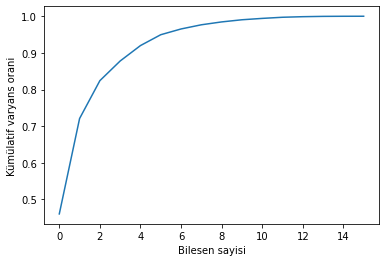

In [190]:
pca = PCA().fit(df_pca)
sns.lineplot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Bilesen sayisi')
plt.ylabel('Kümülatif varyans orani')
plt.show()

Yukaridaki grafik incelendiginde 2 veya 3 tercih edilebilir. Veri gorsellestirme icin kullanildigi durumda 2 boyut secilmelidir. Regresyon problemi ile ilgilenildiginde, coklu dogrusal baglanti problemini gidermek icin degisken sayisi kadar bilesen olusturmak tercih edilebilir. Boylece veri setinin icerisindeki bilginin tamami korunmus olur ancak bu durumda da birbirinden bagimsiz olur. Yuksek koralasyon ve coklu dogrusal baglanti problemlerine sahip olmaz.

### Final PCA modelini olusturma

In [191]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df_pca)
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.26039849, 0.1033886 ])

array([0.46037855, 0.72077704, 0.82416565])

### Temel bilesen regresyon (PCR) modeli

Diyelim ki Hitters veri setini dogrusal bir modelleme ile modellemek istiyoruz ve degiskenler arasinda coklu dogrusal regresyon problemi var. Bu dogrusal regresyon problemlerinde saglanmasi gereken varsayimlardandir. Degiskenler arasinda yüksek korelasyon olmasi, cesitli problemlere neden oldugundan istenmeyen bir durumdur. Diger bir amac ise, yukarida PCA yontemiyle cikarilmis olan bilesenlerin neye karsilik geldigini belirlemeye calismaktir.

### Numerik kolonlarin disinda kalanlari getirme

In [192]:
others = [col for col in df.columns if col not in num_cols]
others

['league', 'division', 'salary', 'newleague']

In [193]:
pd.DataFrame(pca_fit, columns=['PC1', 'PC2', 'PC3']).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [194]:
df[others].head()

,league,division,salary,newleague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


PCR yöntemiyle once bir temel bilesen yontemi uygulanip degiskenlerin boyutu indirgenmekte ve sonrasinda ise bu bilesenlerin uzerine bir regresyon modeli kurulmaktadir. Bunun dogrudan Python'da uygulandigi bir metot yoktur. Python'da olmayip istatistikte olan bir konu oldugundan dolayi bu islemi veri bilimcinin kendisi yapmalidir. Numerik bilesenlerin secilip bilesenlerce ifade edilmesi ve uzerine regresyon modelinin kurulmasi durumunda temel regresyon modeli olusturulur. Olusturulan bu bilesenler degisken olarak kullanilir. Dolayisiyla 'pca_fit' ve df[others] degiskenleri bir araya getirilir.

In [195]:
final_df = pd.concat([pd.DataFrame(pca_fit, columns=['PC1', 'PC2', 'PC3']), df[others]], axis=1)
final_df.head()

,PC1,PC2,PC3,league,division,salary,newleague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


Böylece 16 degiskenin tasidigi bilginin %82'si PC1, PC2 ve PC3 degiskenleri ile temsil edilmektedir. Bu gercek bir ihtyactir. Elde edilen final_df veri setini kullanarak tahminleme yapmak icin lineer ve karar agaci modelleri kullanilmistir. Degiskenleri encode etmek icin label encoding yontemi kullanilmistir.

### Label encoding

In [196]:
def label_encoder(df, binary_cols):
    label_encoder = LabelEncoder()
    df[binary_cols] = label_encoder.fit_transform(df[binary_cols])

In [197]:
binary_cols = [col for col in final_df.columns if final_df[col].nunique() == 2]
for col in binary_cols:
    label_encoder(final_df, col)

final_df.head()

,PC1,PC2,PC3,league,division,salary,newleague
0,-3.240106,-0.253173,0.776066,0,0,NaN,0
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1


### Bagimli degiskendeki eksik verilerin silinmesi

In [198]:
final_df.dropna(inplace=True)
final_df.shape

(263, 7)

### Bagimli ve bagimsiz degiskenlerin secilmesi

In [199]:
y = final_df['salary']
X = final_df.drop('salary', axis=1)

### Lineer regresyon modeli

In [200]:
lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)
print(f'Hata kareler ortalamasi = {mean_squared_error(y, y_pred)}')
print(f'Ortalama mutlak hata = {mean_absolute_error(y, y_pred)}')
print(f'Kök ortalama kare hatasi = {np.sqrt(mean_squared_error(y, y_pred))}')

# 5-katli capraz dogrulama ile rmse degerinin hesaplanmasi
print(f'5 katli capraz dogrulama ile rmse degeri = {np.mean(np.sqrt(-cross_val_score(lr, X, y, cv=5, scoring="neg_mean_squared_error")))}')

Hata kareler ortalamasi = 112133.32935389849
Ortalama mutlak hata = 228.87439847834383
Kök ortalama kare hatasi = 334.8631501881007
5 katli capraz dogrulama ile rmse degeri = 345.6021106351967


<AxesSubplot:xlabel='salary'>

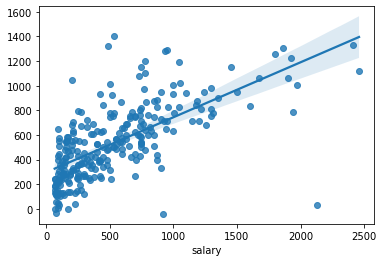

In [201]:
sns.regplot(x=y, y=y_pred, data=final_df)
plt.show()

### Agac modeli

In [202]:
cart = DecisionTreeRegressor().fit(X, y)
y_pred_cart = cart.predict(X)
print(f'Hata kareler ortalamasi = {mean_squared_error(y, y_pred)}')
print(f'Ortalama mutlak hata = {mean_absolute_error(y, y_pred)}')
print(f'Kök ortalama kare hatasi = {np.sqrt(mean_squared_error(y, y_pred))}')

# 5-katli capraz dogrulama ile rmse degerinin hesaplanmasi
print(f'5 katli capraz dogrulama ile rmse degeri = {np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))}')

Hata kareler ortalamasi = 112133.32935389849
Ortalama mutlak hata = 228.87439847834383
Kök ortalama kare hatasi = 334.8631501881007
5 katli capraz dogrulama ile rmse degeri = 393.7392317289797


<AxesSubplot:xlabel='salary'>

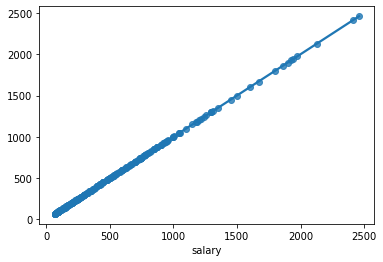

In [203]:
sns.regplot(x=y, y=y_pred_cart, data=final_df)
plt.show()

Yukaridaki grafige gore, modelin overfit oldugu anlasilmaktadir. Nitekim, capraz dogrulamanin yapilmadigi durumda tüm hata degerleri 0 olarak hesaplanmistir.

### Agac modeli icin hiperparametre optimizasyonu

In [204]:
params = {'max_depth': range(1, 11),
          'min_samples_split': range(2, 20)}

best_grid = GridSearchCV(cart, params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
print(best_grid)
cart_final = cart.set_params(**best_grid.best_params_, random_state=1).fit(X, y)
print(f'5 katli capraz dogrulama ile rmse degeri = {np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))}')

Fitting 5 folds for each of 180 candidates, totalling 900 fits
GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(2, 20)},
             verbose=True)
5 katli capraz dogrulama ile rmse degeri = 330.1964109339104


<AxesSubplot:xlabel='salary'>

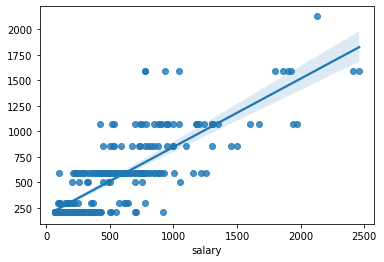

In [205]:
y_pred_cart_final = cart_final.predict(X)
sns.regplot(x=y, y=y_pred_cart_final, data=final_df)
plt.show()

Sonuc olarak, agac modelinin hiperparametre optimizasyonu sonrasinda elde edilen hata degeri, lineer model ile elde edilen hata degerinden nispeten daha dusuk hesaplanmistir. 

## PCA görsellestirme

Burada amac, PCA ile cok boyutlu bir veriyi iki boyutta gorsellestirmektir.

### Veri setini getirme ve bagimli ve bagimsiz degiskenleri secme

In [206]:
dff = pd.read_csv(r'C:\Users\test\Desktop\Bootcamp_Prime\breast_cancer.csv')
y = dff['diagnosis']
X = dff.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)

Bu veri setindeki degiskenler, gorsel veriler uzerinden numerik formlara getirilen degiskenlerdir.

### Amaca yonelik veri setini indirgemek icin tanimlanan 'create_pca_df()' fonksiyonu

In [207]:
def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data = pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

final_df = create_pca_df(X, y)
final_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


Boylece veri setinin bagimsiz degiskenleri PC1 ve PC2 olmak uzere iki bilesene indirgenir.

  ### Veri setinin iki boyuta indirgendikten sonra gorsellestirilmesi

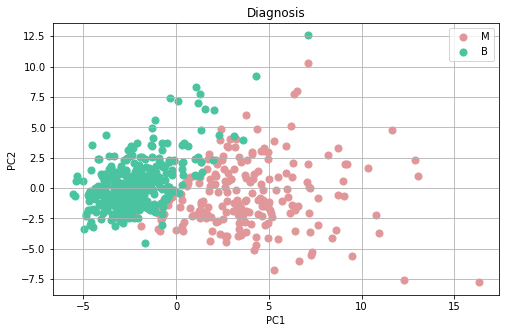

In [208]:
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(f'{target.capitalize()}')
    targets = list(dataframe[target].unique())
    colors = []
    while len(colors) != len(targets):
        colors.append(list(np.random.random_sample(3)))
    
    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], color=color, s=50)
    
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(final_df, 'diagnosis')

Yukarida tanimlanan fonksiyon genellenebilirligi yüksek bir fonksiyon oldugundan, bunu test etmek icin baska bir veri seti olan 'iris' veri setine bu fonksiyonu uygulayalim. Bu veri seti, ciceklerin tac ve canak yaprak bilgileri uzerine kurulu bir veri setidir.

In [209]:
iris = sns.load_dataset('iris')
y = iris['species']
X = iris.drop('species', axis=1)

'create_pca_df' ve 'plot_pca' fonksiyonlari bu anlamda hemen hemen tüm ihtiyaclar icin kullanilabilir. Sadece, bu fonksiyonlara gonderilecek bagimsiz degiskenlerin (X) sayisal degiskenlerden olusmasi gerekmektedir.

In [210]:
final_df = create_pca_df(X, y)
final_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


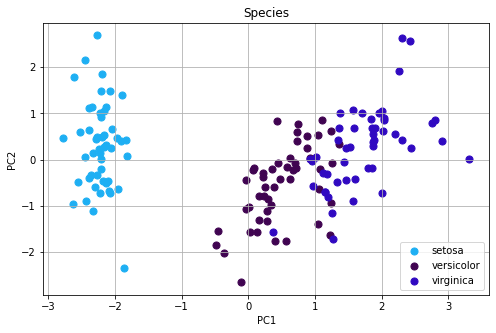

In [211]:
plot_pca(final_df, 'species')

'iris' veri setine gore 'breast_cancer' veri setinin bilesenleri daha fazla birbirine gecmis gibi gozukmektedir. Diger senaryolara gore daha fazla ic ice gecme durumu var. 'breast_cancer' ve 'iris' veri setinin siniflandirma problemine odaklanildiginda, bunlarin siniflarinin birbirinden daha kolay ayrildigi gorulmektedir. 

# Thank you for checking my notebook!